<a href="https://colab.research.google.com/github/AnthonyAugust/Projetos-Finalizados/blob/Projetos-Finalizados/C%C3%A1lculo_de_M%C3%A9tricas_(Tensor_Flow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MÉTRICAS GLOBAIS
Acurácia (overall): 75.10%
Precisão (macro): 75.18% | Recall (macro): 75.16% | Especificidade (macro): 97.23% | F1 (macro): 75.01%
Precisão (micro): 75.10% | Recall (micro): 75.10% | F1 (micro): 75.10%

MÉTRICAS POR CLASSE (0 a 9)
Classe 0: Precision=81.13% | Recall=72.88% | Specificity=97.73% | F1=76.79%
Classe 1: Precision=78.67% | Recall=71.08% | Specificity=98.26% | F1=74.68%
Classe 2: Precision=79.38% | Recall=70.00% | Specificity=97.75% | F1=74.40%
Classe 3: Precision=67.27% | Recall=78.72% | Specificity=96.03% | F1=72.55%
Classe 4: Precision=74.77% | Recall=74.77% | Specificity=96.98% | F1=74.77%
Classe 5: Precision=72.64% | Recall=80.21% | Specificity=96.79% | F1=76.24%
Classe 6: Precision=73.79% | Recall=80.85% | Specificity=97.02% | F1=77.16%
Classe 7: Precision=79.05% | Recall=83.00% | Specificity=97.56% | F1=80.98%
Classe 8: Precision=69.66% | Recall=68.13% | Specificity=97.03% | F1=68.89%
Classe 9: Precision=75.49% | Recall=71.96% | Specificity=97.20% | F1

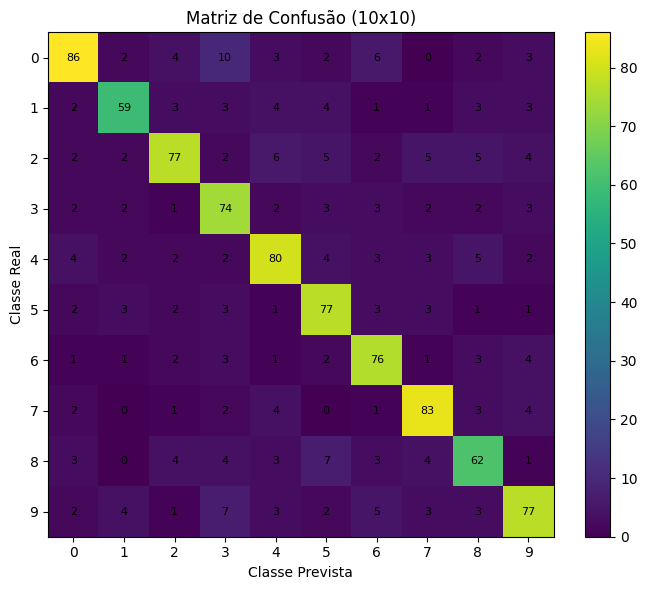

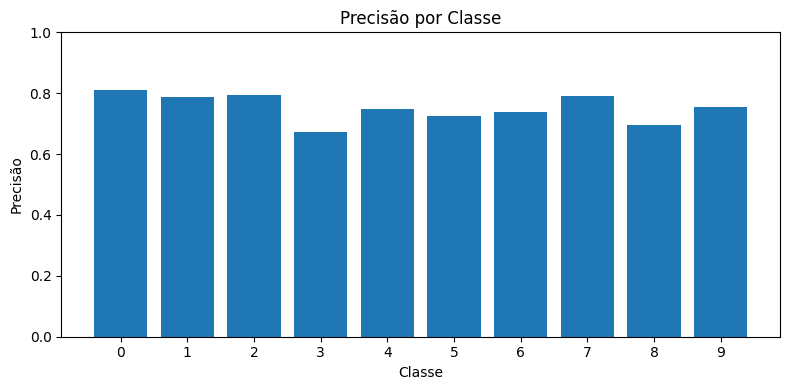

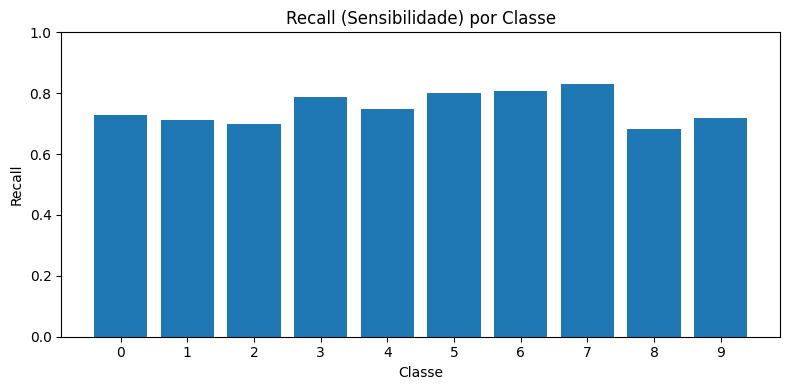

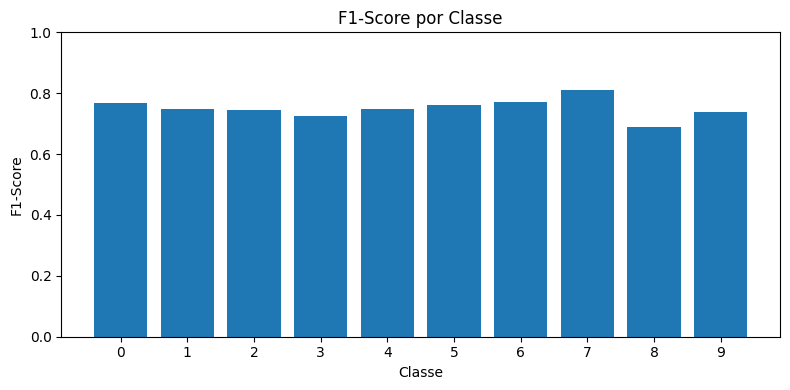

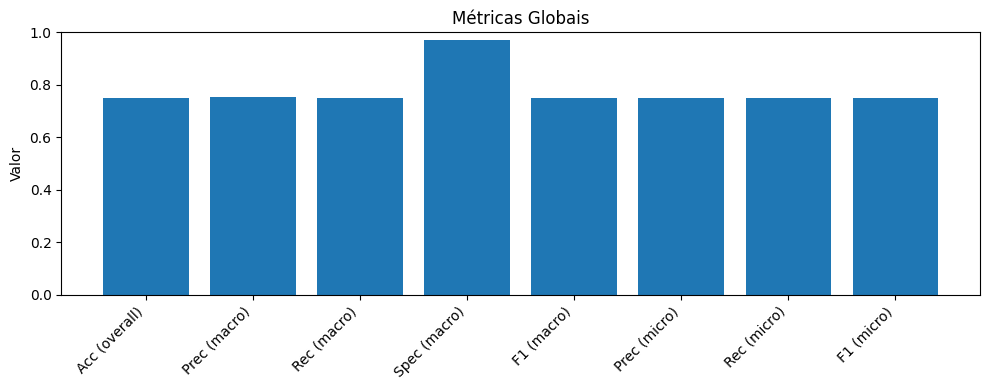


Matriz 10x10 (Confusão) - valores inteiros:
[[86  2  4 10  3  2  6  0  2  3]
 [ 2 59  3  3  4  4  1  1  3  3]
 [ 2  2 77  2  6  5  2  5  5  4]
 [ 2  2  1 74  2  3  3  2  2  3]
 [ 4  2  2  2 80  4  3  3  5  2]
 [ 2  3  2  3  1 77  3  3  1  1]
 [ 1  1  2  3  1  2 76  1  3  4]
 [ 2  0  1  2  4  0  1 83  3  4]
 [ 3  0  4  4  3  7  3  4 62  1]
 [ 2  4  1  7  3  2  5  3  3 77]]


In [3]:
# ================================================
# Projeto: Métricas de Classificação - 10 classes
# Com TensorFlow + Matplotlib (sem seaborn)
# ================================================

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# -----------------------------
# 1) Dados sintéticos (10 classes) e previsões com "barulho"
# -----------------------------
np.random.seed(42)
tf.random.set_seed(42)

num_classes = 10
n_amostras = 1000

# Classes verdadeiras (0..9)
y_true = np.random.randint(0, num_classes, size=n_amostras)

# Gerar previsões com acurácia controlada (~75% corretas)
p_correto = 0.75
mask_correto = np.random.rand(n_amostras) < p_correto
y_pred = y_true.copy()

# Onde for incorreto, sorteia uma classe diferente
indices_errados = np.where(~mask_correto)[0]
for idx in indices_errados:
    alternativas = list(range(num_classes))
    alternativas.remove(int(y_true[idx]))
    y_pred[idx] = np.random.choice(alternativas)

# -----------------------------
# 2) Matriz de confusão (10x10) com TensorFlow
#    Linhas = classe real, Colunas = classe prevista
# -----------------------------
cm_tf = tf.math.confusion_matrix(
    labels=y_true,
    predictions=y_pred,
    num_classes=num_classes
)
cm = cm_tf.numpy()

# -----------------------------
# 3) Funções de métricas (multiclasse)
# -----------------------------
def safe_div(num, den):
    return num / den if den != 0 else 0.0

def per_class_metrics(cm):
    # cm: linhas = real, colunas = previsto
    n = cm.shape[0]
    total = cm.sum()
    tp = np.diag(cm)
    fp = cm.sum(axis=0) - tp
    fn = cm.sum(axis=1) - tp
    tn = total - (tp + fp + fn)

    precision = np.array([safe_div(tp[i], tp[i] + fp[i]) for i in range(n)])
    recall    = np.array([safe_div(tp[i], tp[i] + fn[i]) for i in range(n)])
    spec      = np.array([safe_div(tn[i], tn[i] + fp[i]) for i in range(n)])
    f1        = np.array([safe_div(2 * precision[i] * recall[i], precision[i] + recall[i]) for i in range(n)])

    return precision, recall, spec, f1

def overall_accuracy(cm):
    return safe_div(np.trace(cm), cm.sum())

def macro_average(arr):
    return np.mean(arr)

def micro_metrics(cm):
    # Em multiclasse single-label, micro-precision = micro-recall = accuracy
    tp_sum = np.trace(cm)
    total  = cm.sum()
    # Total de positivos previstos = total de amostras
    # Total de positivos reais     = total de amostras
    precision_micro = safe_div(tp_sum, total)
    recall_micro    = safe_div(tp_sum, total)
    f1_micro        = safe_div(2 * precision_micro * recall_micro, precision_micro + recall_micro)
    return precision_micro, recall_micro, f1_micro

# -----------------------------
# 4) Cálculo das métricas
# -----------------------------
precision_c, recall_c, specificity_c, f1_c = per_class_metrics(cm)

acc_overall     = overall_accuracy(cm)
precision_macro = macro_average(precision_c)
recall_macro    = macro_average(recall_c)
spec_macro      = macro_average(specificity_c)
f1_macro        = macro_average(f1_c)
precision_micro, recall_micro, f1_micro = micro_metrics(cm)

# -----------------------------
# 5) Impressões principais
# -----------------------------
print("MÉTRICAS GLOBAIS")
print(f"Acurácia (overall): {acc_overall:.2%}")
print(f"Precisão (macro): {precision_macro:.2%} | Recall (macro): {recall_macro:.2%} | Especificidade (macro): {spec_macro:.2%} | F1 (macro): {f1_macro:.2%}")
print(f"Precisão (micro): {precision_micro:.2%} | Recall (micro): {recall_micro:.2%} | F1 (micro): {f1_micro:.2%}\n")

print("MÉTRICAS POR CLASSE (0 a 9)")
for i in range(num_classes):
    print(f"Classe {i}: Precision={precision_c[i]:.2%} | Recall={recall_c[i]:.2%} | Specificity={specificity_c[i]:.2%} | F1={f1_c[i]:.2%}")

# -----------------------------
# 6) Gráficos (matplotlib puro, sem cores definidas)
# -----------------------------
# 6.1 Matriz de confusão
plt.figure(figsize=(7, 6))
plt.imshow(cm, aspect='auto')
plt.colorbar()
plt.title("Matriz de Confusão (10x10)")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.xticks(ticks=np.arange(num_classes), labels=[str(i) for i in range(num_classes)])
plt.yticks(ticks=np.arange(num_classes), labels=[str(i) for i in range(num_classes)])

# Anotar contagens em cada célula
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, int(cm[i, j]), ha='center', va='center', fontsize=8)
plt.tight_layout()
plt.show()

# 6.2 Barras: Precisão por classe
indices = np.arange(num_classes)
plt.figure(figsize=(8, 4))
plt.bar(indices, precision_c)
plt.title("Precisão por Classe")
plt.xlabel("Classe")
plt.ylabel("Precisão")
plt.xticks(indices, [str(i) for i in range(num_classes)])
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 6.3 Barras: Recall por classe
plt.figure(figsize=(8, 4))
plt.bar(indices, recall_c)
plt.title("Recall (Sensibilidade) por Classe")
plt.xlabel("Classe")
plt.ylabel("Recall")
plt.xticks(indices, [str(i) for i in range(num_classes)])
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 6.4 Barras: F1 por classe
plt.figure(figsize=(8, 4))
plt.bar(indices, f1_c)
plt.title("F1-Score por Classe")
plt.xlabel("Classe")
plt.ylabel("F1-Score")
plt.xticks(indices, [str(i) for i in range(num_classes)])
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 6.5 Barras: Métricas globais (overall/macro/micro)
labels_global = ["Acc (overall)", "Prec (macro)", "Rec (macro)", "Spec (macro)", "F1 (macro)", "Prec (micro)", "Rec (micro)", "F1 (micro)"]
values_global = [acc_overall, precision_macro, recall_macro, spec_macro, f1_macro, precision_micro, recall_micro, f1_micro]

plt.figure(figsize=(10, 4))
plt.bar(np.arange(len(labels_global)), values_global)
plt.title("Métricas Globais")
plt.ylabel("Valor")
plt.xticks(np.arange(len(labels_global)), labels_global, rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# -----------------------------
# 7) Impressão final da matriz 10x10
# -----------------------------
print("\nMatriz 10x10 (Confusão) - valores inteiros:")
print(cm)